# Graph of Expected Proportion (Figure 1 in Section 2)

For different values of $p$, $n$, $k$



## 0 Preliminaries
### 0.1 Import third Party code

In [1]:
import time
import os        #for benchmarking
import pandas as pd
import ipystata
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import importlib #in case we need to update user-defined code e.g. importlib.reload(diffP)


What is my current directory?

In [7]:
current_dir=os.getcwd()
print(current_dir)

C:\Users\Miller\Dropbox\josh\work\projects\HotHand-Surprised\Sandbox-Theory


#### Let's see which Python code we have in the current directory

In [8]:
for file in os.listdir(current_dir):
    if file[-3:]=='.py':
        print(file)

DifferenceInProportions.py
diffP.py
grayscale.py
prop.py
prop_old.py


### 0.2 Let's import specialized Python code

In [9]:
import prop #The programs live here
importlib.reload(prop)
#help(prop)
print('Locked and loaded')

Locked and loaded


## 1. Exploring the distribution of the proportion, and its expected value
### 1.1 Here is an explanation of the objects in prop.py (can be skipped)


The recursive algorithm presented here is replaces the numerical numerical formula derived in Miller & Sanjurjo (2015), which is based on the joint distributions of runs.  It extends an idea from Michael Wiener's <a href="https://twitter.com/m_j_wiener/status/981138844710916096">C++ code shared on twitter</a>. See Appendix E of the online Supplment Material for a dicussion of the algorithm.


$B$ below is an $(n+1)^2$ matrix of dictionaries $B[h][s]$,  where:
+ $n$ is the number of shots, and $k$ is the length of streaks we are interested in  
+ $h=\min\{l_h,k\}$ where $l_h$ is the length of the hit streak to the left
+ $s$ is the number of remaining shots to be taken

Each entry of the matrix $B[h][s]$ consists of a dictionary of elements
$$B[h][s]:=\{\quad (n_{M|kH},n_{H|kH}):\gamma\quad \}_{n_{M|kH},n_{H|kH},\gamma}$$

+ The dictionary key $(n_{M|kH},n_{H|kH})$ is a tuple consisting of the number of misses after $k$ hits, the number of hits after $k$ hits, etc.
+ The value $\gamma$ is the probability that given the $h$ consecutive hits to the left (up to length $k$), the next $s$ trials will produce $(n_{M|kH},n_{H|kH})$.
+ Example 1: for $k=1$ the dictionary $B[0][2]$ characterizes 4 possible sequences from the two shots remaining, and 3 unique keys: $B[0][2]=\{(0,0):.5, (1,0):.25, (0,1):.25\}$
+ Example 2: for $k=2$ the dictionary $B[2][2]$  characterizes 4 possible sequences from the two shots remaining, and 3 unique keys: $B[2][2]=\{(1,0):.5, (1,1):.25, (0,2):.25\}$
+ Example 3: for $k=3$ the dictionary $B[3][1]$  characterizes 2 possible sequences from the one shot remaining, and 2 unique keys: $B[3][1]=\{(1,0):.5, (0,1):.5\}$ 

We can build $B$ iteratively by observing that $B[n][0]=\{(0,0):1\}$ for all $n$ as there is only possibility for $(n_{M|kH},n_{H|kH})$ if there are no more trials to observe.  Further that outcome of the next shot will be a miss (probability= $q$) or a make (probability = $p$), in each case the number of remaining shots is decremented by one, and if the current streak $h<k$ then it either ends, or is increased by one, i.e. $B[h][s]=B[0][s-1]^{(0,0):q}+B[h+1][s-1]^{(0,0):p}$ for $h<k$; otherwise if the current streak is of length $k$ that streak iether ends or continues, $B[k][s]=B[0][s-1]^{(1,0):q}+B[k][s-1]^{(0,1):p}$.  Note on notations: the keys from the exponent are summed with the corresponding keys in the dictionary while the values in the exponent are multiplied by the corresponding values in the dictionary. When adding two dictionaries together, if a key appears in both dictionaries then the corresponding values are added together.  We now only need to be careful to build the dictionaries in the correct order after initializing, and we are done.


### 1.2 Fully Monty: Run Python code to generate the matrix (3x5 list) of dictionaries

**Adjust Parameters as needed**

In [5]:
number_of_shots=100
max_streak_length=5
num_probabilities = 3

B = [[None for column in range(num_probabilities)] for row in range(max_streak_length+1) ]
#B=[None]
t0 = time.time()
for streak_length in range(1,max_streak_length+1):
    for i in range(num_probabilities):
        probability_of_hit=.25+ i*.25
        B[streak_length][i]=prop.outcome_and_frequency_dictionary(number_of_shots,streak_length,probability_of_hit)
t1 = time.time()
total = t1-t0

print('time in seconds=',total)
print('Dictionary Ready')

time in seconds= 4.552440643310547
Dictionary Ready


### 1.3 Now let's graph the expected proportion, as a function of the number of shots

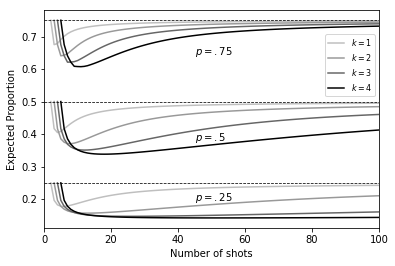

In [6]:
max_streak_length=4
num_probabilities = 3

#plt.figure(figsize=(8, 6),facecolor="white") 

#don't include gray borders
plt.figure(facecolor="white")
#plt.style.use('grayscale')

#don't incude negative x-axis
plt.xlim(0, 100)

#gray intensity for descrimination on my screen
g1 = .75 
g2 = .6
g3 = .4
g4 = 0
tableau4=[(g1,g1,g1),(g2,g2,g2),(g3,g3,g3),(g4,g4,g4)]
#tableau4=[(g-i/3*g,g-i/3*g,g-i/3*g) for i in range(4)]

#initialize list  
nshots = [[None for column in range(num_probabilities)] for row in range(max_streak_length+1) ]
exp_proportion = [[None for column in range(num_probabilities)] for row in range(max_streak_length+1) ]

#plot each graph
for i in range(num_probabilities):
    
    #plt.gca().set_prop_cycle(None)
    for streak_length in range(1,max_streak_length+1):
        #print(i)
        n = number_of_shots
        k = streak_length
        probability_of_hit=.25+ i*.25
        
        #make list x/y-values for plotting
        nshots[k][i] = list(range(k+1,n+1))
        exp_proportion[k][i]= [prop.expected_proportion(n,k,B[k][i]) for n in range(k+1,n+1)] 
        #plt.plot(nshots[k][i],exp_proportion[k][i],color=tableau5[k-1])
        
        #plot the x/y values
        if i==0:
            plt.plot(nshots[k][i],exp_proportion[k][i],label='$k=$'+str(k),color=tableau4[k-1])
        else:
            plt.plot(nshots[k][i],exp_proportion[k][i],color=tableau4[k-1])


#plot reference lines
plt.plot([0, 100], [.75, .75], 'k--',lw=.75)
plt.plot([0, 100], [.5, .5], 'k--',lw=.75)
plt.plot([0, 100], [.25, .25], 'k--',lw=.75)

#plot text
plt.text(45, .645, '$p=.75$')
plt.text(45, .38, '$p=.5$')
plt.text(45, .195, '$p=.25$')

#plot axis labels
plt.ylabel('Expected Proportion')
plt.xlabel('Number of shots')

#plot legend
plt.legend(bbox_to_anchor=(1, .91), loc=1,prop={'size': 8})

#save figure
plt.savefig("test.pdf", bbox_inches="tight");  

#plt.axis([0, 6, 0, 20])


In [10]:
filename = 'a'+ str(2)+ 'z'
print(filename)

a2z
